In [2]:
import pandas as pd
import numpy as np
# plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Modelling
from sklearn.model_selection import train_test_split 

from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
# import graphviz
# Scaling with Minmax-scaler
from sklearn.preprocessing import MinMaxScaler

#KNN classifier
from sklearn.neighbors import KNeighborsClassifier
#cross validation 
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
# import custom functions
from custom_functions import our_metrics, get_kappa, comb_metrics
%config Completer.use_jedi = False
pd.set_option('display.max_rows', None)
from sklearn import metrics

from sklearn.naive_bayes import CategoricalNB

In [3]:
# reading all the csv files 
y_train = pd.read_csv('../data/petfinder-adoption-prediction/train/y_train.csv')
y_test = pd.read_csv('../data/petfinder-adoption-prediction/train/y_test.csv')
X_test = pd.read_csv('../data/petfinder-adoption-prediction/train/X_test_minmax_scaled_dropped_first.csv')
X_train = pd.read_csv('../data/petfinder-adoption-prediction/train/X_train_minmax_scaled_dropped_first.csv')

In [11]:
#X_train = X_train.drop('description_char', axis=1)
#X_test = X_test.drop('description_char', axis=1)


In [64]:
clf = CategoricalNB(force_alpha=True)

clf.fit(X_train, np.ravel(y_train))

CategoricalNB(force_alpha=True)

In [20]:
y_pred= clf.predict(X_test)

In [40]:
y_pred.shape

(2892,)

In [19]:
clf.predict_proba(X_test)

array([[0.31781065, 0.29198034, 0.17112143, 0.21908757],
       [0.1944845 , 0.34298995, 0.25628244, 0.20624311],
       [0.29052037, 0.37121834, 0.17794442, 0.16031687],
       ...,
       [0.22181042, 0.36126281, 0.23472252, 0.18220425],
       [0.4116202 , 0.29767531, 0.12454618, 0.16615831],
       [0.17864725, 0.29725389, 0.25514059, 0.26895826]])

Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.3468
_____________________
Weighted Quadratic Kappa: 0.2292


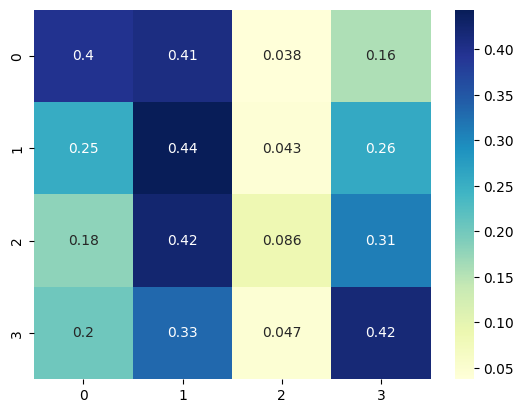

In [62]:

our_metrics(y_test, y_pred)

In [65]:
# import the csv files

y_train_dogs = pd.read_csv('../data/petfinder-adoption-prediction/train/y_train_dogs.csv')
y_test_dogs = pd.read_csv('../data/petfinder-adoption-prediction/train/y_test_dogs.csv')

X_test_dogs = pd.read_csv('../data/petfinder-adoption-prediction/train/X_test_dogs_dropped.csv')
X_train_dogs = pd.read_csv('../data/petfinder-adoption-prediction/train/X_train_dogs_dropped.csv')

In [66]:
#dogs
clf.fit(X_train_dogs, np.ravel(y_train_dogs))

CategoricalNB(force_alpha=True)

In [67]:
y_pred_dogs = clf.predict(X_test_dogs)

Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.3388
_____________________
Weighted Quadratic Kappa: 0.2133


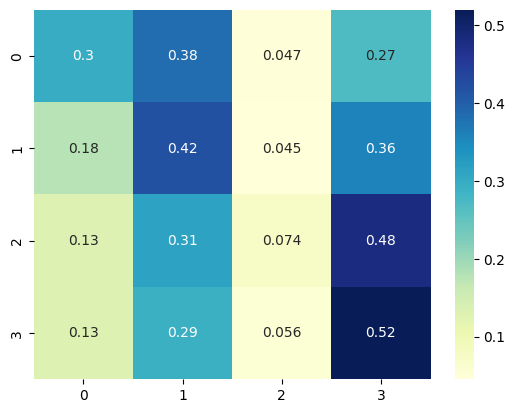

In [68]:
our_metrics(y_test_dogs, y_pred_dogs)

In [70]:
# import the csv files

y_train_cats = pd.read_csv('../data/petfinder-adoption-prediction/train/y_train_cats.csv')
y_test_cats = pd.read_csv('../data/petfinder-adoption-prediction/train/y_test_cats.csv')

X_test_cats = pd.read_csv('../data/petfinder-adoption-prediction/train/X_test_cats_dropped.csv')
X_train_cats = pd.read_csv('../data/petfinder-adoption-prediction/train/X_train_cats_dropped.csv')

In [71]:
clf.fit(X_train_cats, np.ravel(y_train_cats))

CategoricalNB(force_alpha=True)

In [72]:
y_pred_cats = clf.predict(X_test_cats)

Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.3689
_____________________
Weighted Quadratic Kappa: 0.1976


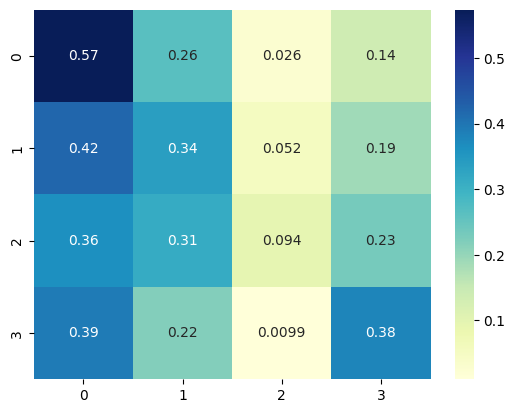

In [73]:
our_metrics(y_test_cats, y_pred_cats)

0.37655601659751037
Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.3766
_____________________
Weighted Quadratic Kappa: 0.2672


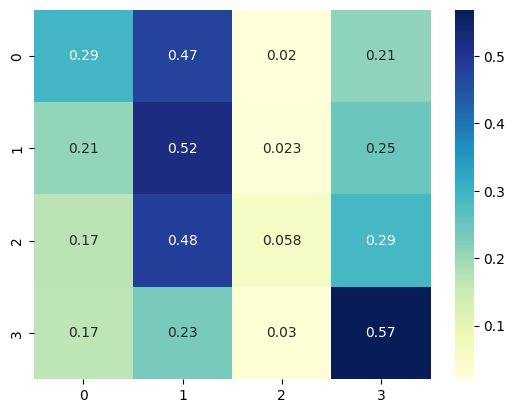

In [60]:
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, np.ravel(y_train))
svm_predictions = svm_model_linear.predict(X_test)
  
# model accuracy for X_test  
accuracy = svm_model_linear.score(X_test, y_test)
print(accuracy) 
# creating a confusion matrix
our_metrics(y_test, svm_predictions)


0.279045643153527
Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.279
_____________________
Weighted Quadratic Kappa: 0.0406


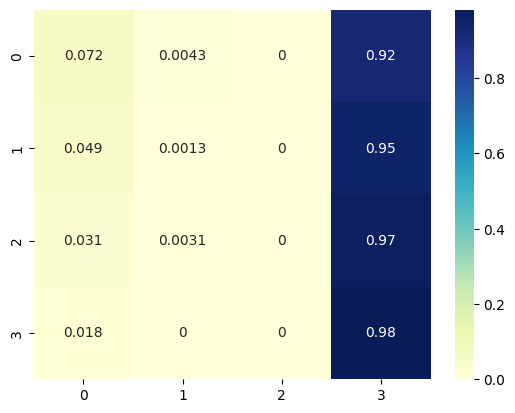

In [61]:
# training a Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, np.ravel(y_train))
gnb_predictions = gnb.predict(X_test)
  
# accuracy on X_test
accuracy = gnb.score(X_test, y_test)
print (accuracy)
  
# creating a confusion matrix
our_metrics(y_test, gnb_predictions)